In [1]:
import os
# numerical computing package
import numpy as np
# 
from scipy import stats
# command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
# matplotlib
import matplotlib
# find nearest value
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
#
def round_to_base(x, base=5):
    return int(base * round(float(x) / base))
#
def listrange(end, start=0, step=1):
    return list(range(start, end, step))
#
import sys
#
import pickle
#
import xarray as xr
#
from glob import glob as gb
#
import time
#
import cartopy.crs as ccrs
# basemap toolkit to plot maps
from mpl_toolkits.basemap import Basemap

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
!pwd

/home/561/erd561/wombat_jra-iaf_mom025


In [4]:
figures_path = '/home/561/erd561/figures/wombat_jra_mom025/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

remote_path1 = '/g/data/ua8/JRA55-do/v1-3/'

remote_path2 = '/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/'

Figures will be saved in: /home/561/erd561/figures/wombat_jra_mom025/c01_JRA55-do_diagnostics



In [5]:
%%time

from dask.distributed import Client
c = Client()
print(c)

<Client: scheduler='tcp://127.0.0.1:35968' processes=8 cores=8>
CPU times: user 638 ms, sys: 118 ms, total: 756 ms
Wall time: 3.12 s


In [6]:
# q_10, rain, rlds, rsds, snow, t_10, u_10, v_10
years = listrange(1958, 2017)
print(years)
var1 = 't_10'
files1 = sorted(gb(remote_path1 + var1 + '.*.18Oct2017.nc'))

# remove 2017 as is missing
# del files1[-1]

for f in files1:
    print(f)
    
print(len(files1))


var2 = 'u_10'
files2 = sorted(gb(remote_path1 + var2 + '.*.18Oct2017.nc'))
for f in files2:
    print(f)
print(len(files2))

[1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
/g/data/ua8/JRA55-do/v1-3/t_10.1958.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1959.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1960.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1961.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1962.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1963.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1964.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1965.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1966.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1967.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1968.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1969.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1970.18Oct2017.nc
/g/data/

In [7]:
# %%time

# tas_10m = []
# uas_10m = []
# for f1, f2 in zip(files1, files2):
    
#     if f1 == files1[0]:
#         lon = \
#             xr.open_dataset(f1).\
#             longitude.\
#             sel(longitude=slice(100,170))
#         lat = \
#             xr.open_dataset(f1).\
#             latitude.\
#             sel(latitude=slice(-70,-10))
        
#         tas_10m = \
#             xr.open_dataset(f1).\
#             tas_10m.\
#             sel(latitude=slice(-70,-10), longitude=slice(100,170)).\
#             mean(dim='time')-273.15
#         print(str(f1) + ' OK')
        
#         uas_10m = \
#             xr.open_dataset(f2).\
#             uas_10m.\
#             sel(latitude=slice(-70,-10), longitude=slice(100,170)).\
#             mean(dim='time')
#         print(str(f2) + ' OK')
            
#     else:
#         tas_10m = \
#             xr.concat([
#                 tas_10m,
#                 xr.open_dataset(f1).\
#                 tas_10m.\
#                 sel(latitude=slice(-70,-10), longitude=slice(100,170)).\
#                 mean(dim='time')-273.15
#             ], 'year'
#             )
#         print(str(f1) + ' OK')
        
#         uas_10m = \
#             xr.concat([
#                 uas_10m,
#                 xr.open_dataset(f2).\
#                 uas_10m.\
#                 sel(latitude=slice(-70,-10), longitude=slice(100,170)).\
#                 mean(dim='time')
#             ], 'year'
#             )
#         print(str(f2) + ' OK')
    
# tas_10m = tas_10m.assign_coords(year=years)
# uas_10m = uas_10m.assign_coords(year=years)
    
# print(tas_10m.shape)
# print(uas_10m.shape)

/g/data/ua8/JRA55-do/v1-3/t_10.1958.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1958.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1959.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1959.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1960.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1960.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1961.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1961.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1962.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1962.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1963.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1963.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1964.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1964.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1965.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1965.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1966.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1966.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1967.18Oct2017.nc OK
/g/data/ua8/

In [13]:
%%time

for f1, f2 in zip(files1, files2):
    
    if f1 == files1[0]:
        lon = \
            xr.open_dataset(f1).\
            longitude
        lat = \
            xr.open_dataset(f1).\
            latitude.\
            sel(latitude=slice(-90,-10))
        
#         tas_10m = \
#             xr.open_dataset(f1).\
#             tas_10m.\
#             sel(latitude=slice(-70,-10)).\
#             mean(dim='time')-273.15
#         print(str(f1) + ' OK')
        
        uas_10m = \
            xr.open_dataset(f2).\
            uas_10m.\
            sel(latitude=slice(-90,-10)).\
            mean(dim='time')
        print(str(f2) + ' OK')
            
    else:
#         tas_10m = \
#             xr.concat([
#                 tas_10m,
#                 xr.open_dataset(f1).\
#                 tas_10m.\
#                 sel(latitude=slice(-70,-10)).\
#                 mean(dim='time')-273.15
#             ], 'year'
#             )
#         print(str(f1) + ' OK')
        
        uas_10m = \
            xr.concat([
                uas_10m,
                xr.open_dataset(f2).\
                uas_10m.\
                sel(latitude=slice(-90,-10)).\
                mean(dim='time')
            ], 'year'
            )
        print(str(f2) + ' OK')
    
# tas_10m = tas_10m.assign_coords(year=years)
uas_10m = uas_10m.assign_coords(year=years)
    
# print(tas_10m.shape)
print(uas_10m.shape)

/g/data/ua8/JRA55-do/v1-3/u_10.1958.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1959.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1960.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1961.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1962.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1963.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1964.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1965.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1966.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1967.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1968.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1969.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1970.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1971.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1972.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1973.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1974.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1975.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1976.18Oct2017.nc OK
/g/data/ua8/

In [15]:
print(uas_10m)

<xarray.DataArray 'uas_10m' (year: 59, latitude: 142, longitude: 640)>
array([[[-3.558305, -3.517351, ..., -3.62631 , -3.59231 ],
        [-4.27972 , -4.244307, ..., -4.338104, -4.30891 ],
        ...,
        [-3.461023, -3.286368, ..., -3.816713, -3.634974],
        [-3.398992, -3.211694, ..., -3.746296, -3.570333]],

       [[-3.276361, -3.237663, ..., -3.340946, -3.308656],
        [-4.073827, -4.039454, ..., -4.130579, -4.102209],
        ...,
        [-3.483517, -3.321882, ..., -3.802387, -3.638935],
        [-3.391704, -3.212615, ..., -3.706838, -3.546523]],

       ...,

       [[-3.520651, -3.471922, ..., -3.603899, -3.562272],
        [-4.282773, -4.24145 , ..., -4.35269 , -4.317735],
        ...,
        [-3.786818, -3.620925, ..., -4.12829 , -3.949826],
        [-3.634505, -3.451989, ..., -3.973823, -3.79849 ]],

       [[-3.794325, -3.75159 , ..., -3.865065, -3.8297  ],
        [-4.514954, -4.478856, ..., -4.573975, -4.544472],
        ...,
        [-3.560441, -3.409682, .

1958 OK
1959 OK
1960 OK
1961 OK
1962 OK
1963 OK
1964 OK
1965 OK
1966 OK
1967 OK
1968 OK
1969 OK
1970 OK
1971 OK
1972 OK
1973 OK
1974 OK
1975 OK
1976 OK
1977 OK
1978 OK
1979 OK
1980 OK
1981 OK
1982 OK
1983 OK
1984 OK
1985 OK
1986 OK
1987 OK
1988 OK
1989 OK
1990 OK
1991 OK
1992 OK
1993 OK
1994 OK
1995 OK
1996 OK
1997 OK
1998 OK
1999 OK
2000 OK
2001 OK
2002 OK
2003 OK
2004 OK
2005 OK
2006 OK
2007 OK
2008 OK
2009 OK
2010 OK
2011 OK
2012 OK
2013 OK
2014 OK
2015 OK
2016 OK
CPU times: user 6min 22s, sys: 3min 3s, total: 9min 25s
Wall time: 5min 51s


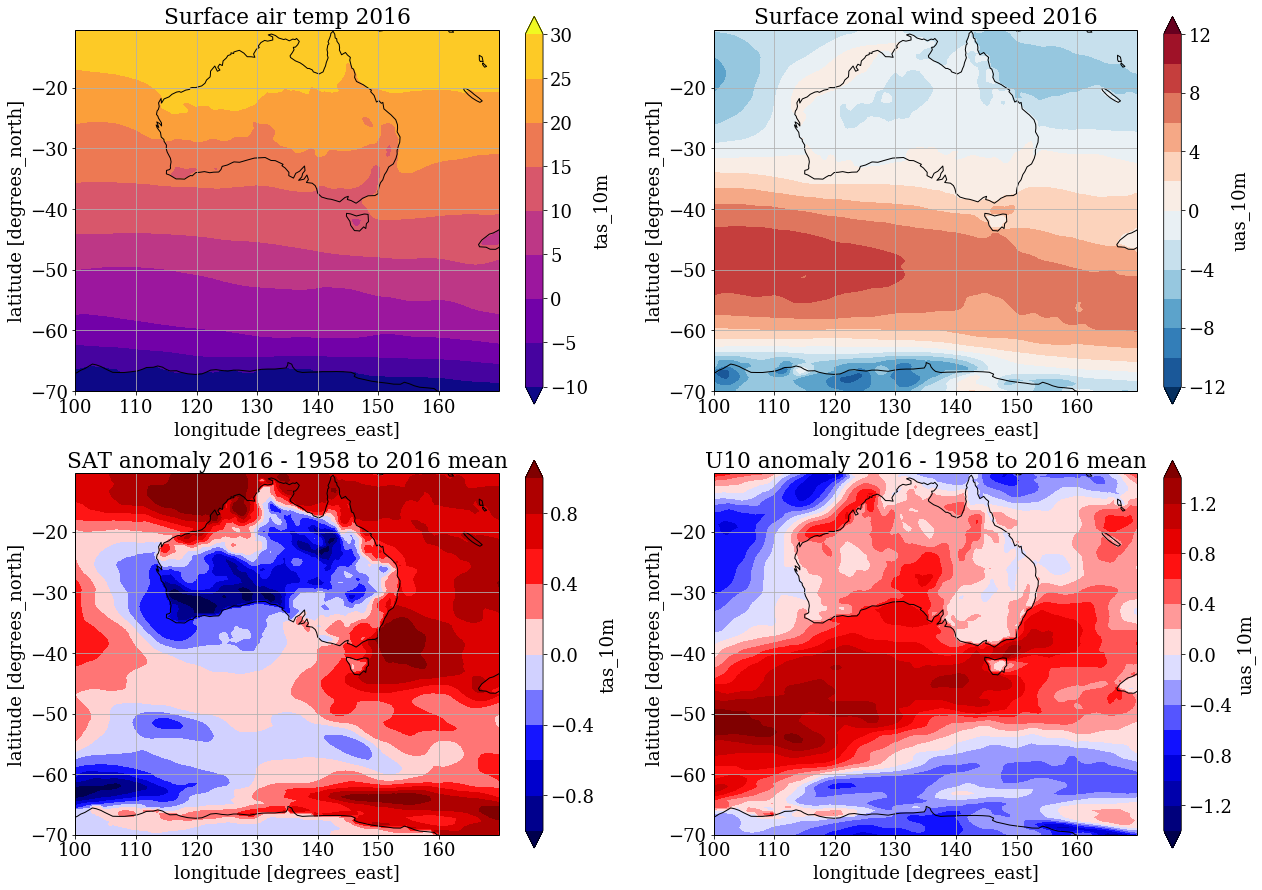

In [9]:
%%time

matplotlib.rcParams.update({'font.size': 18}) 
row = 2
col = 2
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


for fid, (f1, f2) in enumerate(zip(files1, files2)):
    plt.close('all')
    fig = plt.figure() 
    fig.set_size_inches(18,14)


    ##
    ax = plt.subplot(row,col,1, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'plasma'
    step = 5
    contf_lvls = np.arange(-10,30+1e-08,step) 
    tas_10m[fid].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('Surface air temp ' + str(years[fid]))
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()
    
    ax = plt.subplot(row,col,2, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'RdBu_r'
    step = 2
    contf_lvls = np.arange(-12,12+1e-08,step)
    uas_10m[fid].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('Surface zonal wind speed ' + str(years[fid]))
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()

    ##
    ax = plt.subplot(row,col,3, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'seismic'
    step = 0.2
    contf_lvls = np.arange(-1,1+1e-08,step) 
    tas_10m_anom = tas_10m[fid] - tas_10m.mean(dim='year')
    tas_10m_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('SAT anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()

    ax = plt.subplot(row,col,4, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'seismic'
    step = 0.2
    contf_lvls = np.arange(-1.4,1.4+1e-08,step)
    uas_10m_anom = uas_10m[fid] - uas_10m.mean(dim='year')
    uas_10m_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('U10 anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()

    fig.tight_layout(rect=[0, 0, 1, 0.90])

    output_ls = os.listdir(figures_path)
    if not script_name:
        script_name = 'test'
    elif script_name not in output_ls:
        os.mkdir(figures_path + '/' + script_name)
    plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
                + '_fig1_' + str(years[fid]) + '.png', bbox_inches='tight', dpi=200)
    
    print(str(years[fid]) + ' OK')



In [12]:
%%time

tas_10m_slopes = xr.DataArray(np.zeros([len(lat), len(lon)]), \
                              dims=('latitude', 'longitude'), coords=[lat, lon], name='tas_10m')
uas_10m_slopes = xr.DataArray(np.zeros([len(lat), len(lon)]), \
                              dims=('latitude', 'longitude'), coords=[lat, lon], name='uas_10m')
for iid, i in enumerate(lat):
    for jid, j in enumerate(lon):
        tas_10m_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(years, tas_10m[:, iid, jid])
        uas_10m_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(years, uas_10m[:, iid, jid])

    print('lat ' + str(np.array(i)))




TypeError: list indices must be integers or slices, not tuple

In [ ]:
%%time

lon_GAB = [116, 146.5]
lat_GAB = [-42.5, -30]
    
sst_GAB_anom = \
    sst.\
    sel(yt_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xt_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean')) - \
    sst.\
    sel(yt_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xt_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean', 'year'))
print(str(f1) + ' OK')

taux_GAB_anom = \
    taux.\
    sel(yu_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xu_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean')) - \
    taux.\
    sel(yu_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xu_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean', 'year'))
print(str(f2) + ' OK')
            
print(sst_GAB_anom.shape)
print(sst_GAB_anom)
print(taux_GAB_anom.shape)
print(taux_GAB_anom)


lon_TS = [146.5, 155]
lat_TS = [-45, -35]
sst_TS_anom = \
    sst.\
    sel(yt_ocean=slice(lat_TS[0],lat_TS[1]), 
        xt_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean')) - \
    sst.\
    sel(yt_ocean=slice(lat_TS[0],lat_TS[1]), 
        xt_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean', 'year'))
print(str(f1) + ' OK')
taux_TS_anom = \
    taux.\
    sel(yu_ocean=slice(lat_TS[0],lat_TS[1]), 
        xu_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean')) - \
    taux.\
    sel(yu_ocean=slice(lat_TS[0],lat_TS[1]), 
        xu_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean', 'year'))
print(str(f2) + ' OK')       
print(sst_TS_anom.shape)
print(sst_TS_anom)
print(taux_TS_anom.shape)
print(taux_TS_anom)


lon_LC = [110, 116]
lat_LC = [-35, -20]
sst_LC_anom = \
    sst.\
    sel(yt_ocean=slice(lat_LC[0],lat_LC[1]), 
        xt_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean')) - \
    sst.\
    sel(yt_ocean=slice(lat_LC[0],lat_LC[1]), 
        xt_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean', 'year'))
print(str(f1) + ' OK')
taux_LC_anom = \
    taux.\
    sel(yu_ocean=slice(lat_LC[0],lat_LC[1]), 
        xu_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean')) - \
    taux.\
    sel(yu_ocean=slice(lat_LC[0],lat_LC[1]), 
        xu_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean', 'year'))
print(str(f2) + ' OK')       
print(sst_LC_anom.shape)
print(sst_LC_anom)
print(taux_LC_anom.shape)
print(taux_LC_anom)

False
CPU times: user 4.57 s, sys: 1.94 s, total: 6.51 s
Wall time: 4.11 s


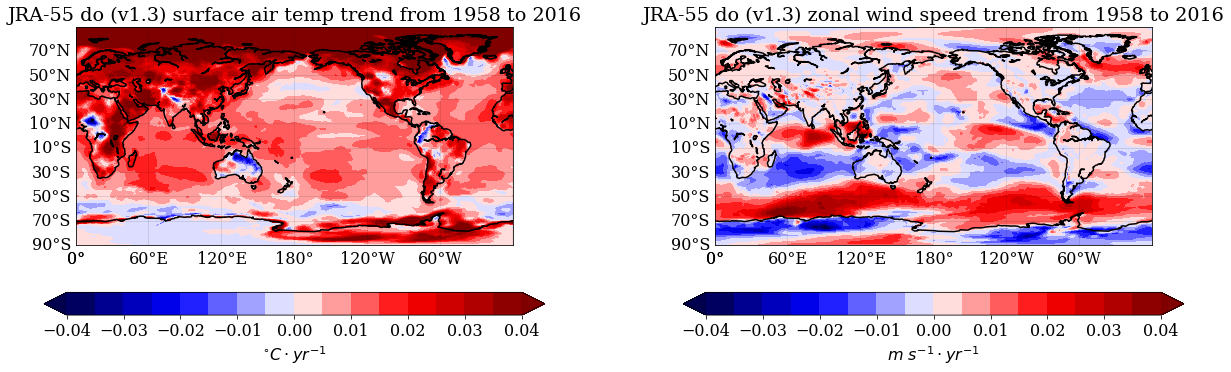

In [38]:
%%time

matplotlib.rcParams.update({'font.size': 16}) 
row = 1
col = 2
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


plt.close('all')
fig = plt.figure() 
fig.set_size_inches(18,6)

#
Bm = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
llcrnrlon=0,urcrnrlon=360, resolution='c')
 # meshgrid of lon lats
lons, lats = np.meshgrid(lon, lat)
# use projection template to create x and y axis
Bm_lons, Bm_lats = Bm(lons, lats)

xx,yy = Bm(105, -15)
value = Bm.is_land(xx,yy)
print(value)


##
ax = plt.subplot(row,col,1)
cmap = 'seismic'
step = 0.005
contf_lvls = np.arange(-0.04,0.04+1e-08,step) 
# draw land outlines
Bm.drawcoastlines(linewidth=1.5)
contf = Bm.contourf(Bm_lons, Bm_lats, tas_10m_slopes, 
                   contf_lvls, cmap=cmap, extend='both')
# meridians. last input is meridians tick label
Bm.drawmeridians(np.arange(0, 360, 60), linewidth=0.2, labels=[0,0,0,1])
# parallels. last input is paralles tick label
Bm.drawparallels(np.arange(-90, 90, 20), linewidth=0.2, labels=[1,0,0,0])
plt.title('JRA-55 do (v1.3) surface air temp trend from 1958 to 2016')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('$^{\circ}C \cdot yr^{-1}$')


##
ax = plt.subplot(row,col,2)
cmap = 'seismic'
step = 0.005
contf_lvls = np.arange(-0.04,0.04+1e-08,step) 
# draw land outlines
Bm.drawcoastlines(linewidth=1.5)
contf = Bm.contourf(Bm_lons, Bm_lats, uas_10m_slopes, 
                   contf_lvls, cmap=cmap, extend='both')
# meridians. last input is meridians tick label
Bm.drawmeridians(np.arange(0, 360, 60), linewidth=0.2, labels=[0,0,0,1])
# parallels. last input is paralles tick label
Bm.drawparallels(np.arange(-90, 90, 20), linewidth=0.2, labels=[1,0,0,0])
plt.title('JRA-55 do (v1.3) zonal wind speed trend from 1958 to 2016')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('$m\ s^{-1} \cdot yr^{-1}$')


# ax = plt.subplot(row,col,2, projection=ccrs.PlateCarree())
# ax.coastlines()
# cmap = 'seismic'
# step = 0.005
# contf_lvls = np.arange(-0.04,0.04+1e-08,step)
# uas_10m_slopes.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
# # plt.title('Surface zonal wind speed ' + str(years[fid]))
# ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
# ax.grid()

fig.tight_layout(rect=[0, 0, 1, 0.90])

# output_ls = os.listdir(figures_path)
# if not script_name:
#     script_name = 'test'
# elif script_name not in output_ls:
#     os.mkdir(figures_path + '/' + script_name)
# plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
#             + '_fig5_.png', bbox_inches='tight', dpi=200)



In [26]:
uas_10m_baseline = uas_10m.sel(year=slice(1958,1977)).mean(dim='year')

uas_10m_20082016_baseline = uas_10m.sel(year=slice(2008,2016)).mean(dim='year') - uas_10m_baseline
uas_10m_19982007_baseline = uas_10m.sel(year=slice(1998,2007)).mean(dim='year') - uas_10m_baseline
uas_10m_19881997_baseline = uas_10m.sel(year=slice(1988,1997)).mean(dim='year') - uas_10m_baseline
uas_10m_19781987_baseline = uas_10m.sel(year=slice(1978,1987)).mean(dim='year') - uas_10m_baseline
# uas_10m_19681977_baseline = uas_10m.sel(year=slice(1968,1977)).mean(dim='year') - uas_10m_baseline


print(uas_10m_baseline)




<xarray.DataArray 'uas_10m' (latitude: 142, longitude: 640)>
array([[-3.568312, -3.528249, -3.488185, ..., -3.668117, -3.634848, -3.60158 ],
       [-4.343399, -4.308617, -4.273833, ..., -4.429094, -4.400527, -4.371964],
       [-4.630167, -4.589979, -4.549792, ..., -4.740185, -4.70351 , -4.66684 ],
       ...,
       [-3.792295, -3.633197, -3.462915, ..., -4.258852, -4.111894, -3.946381],
       [-3.693706, -3.540891, -3.360106, ..., -4.146634, -4.012106, -3.845981],
       [-3.612358, -3.445676, -3.287493, ..., -4.06874 , -3.921592, -3.761345]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -89.57 -89.01 -88.45 -87.89 -87.33 -86.77 ...
  * longitude  (longitude) float64 0.0 0.5625 1.125 1.688 2.25 2.812 3.375 ...


In [30]:
print(listrange(22,0,2))

[]


False
CPU times: user 12.4 s, sys: 5.75 s, total: 18.2 s
Wall time: 11.3 s


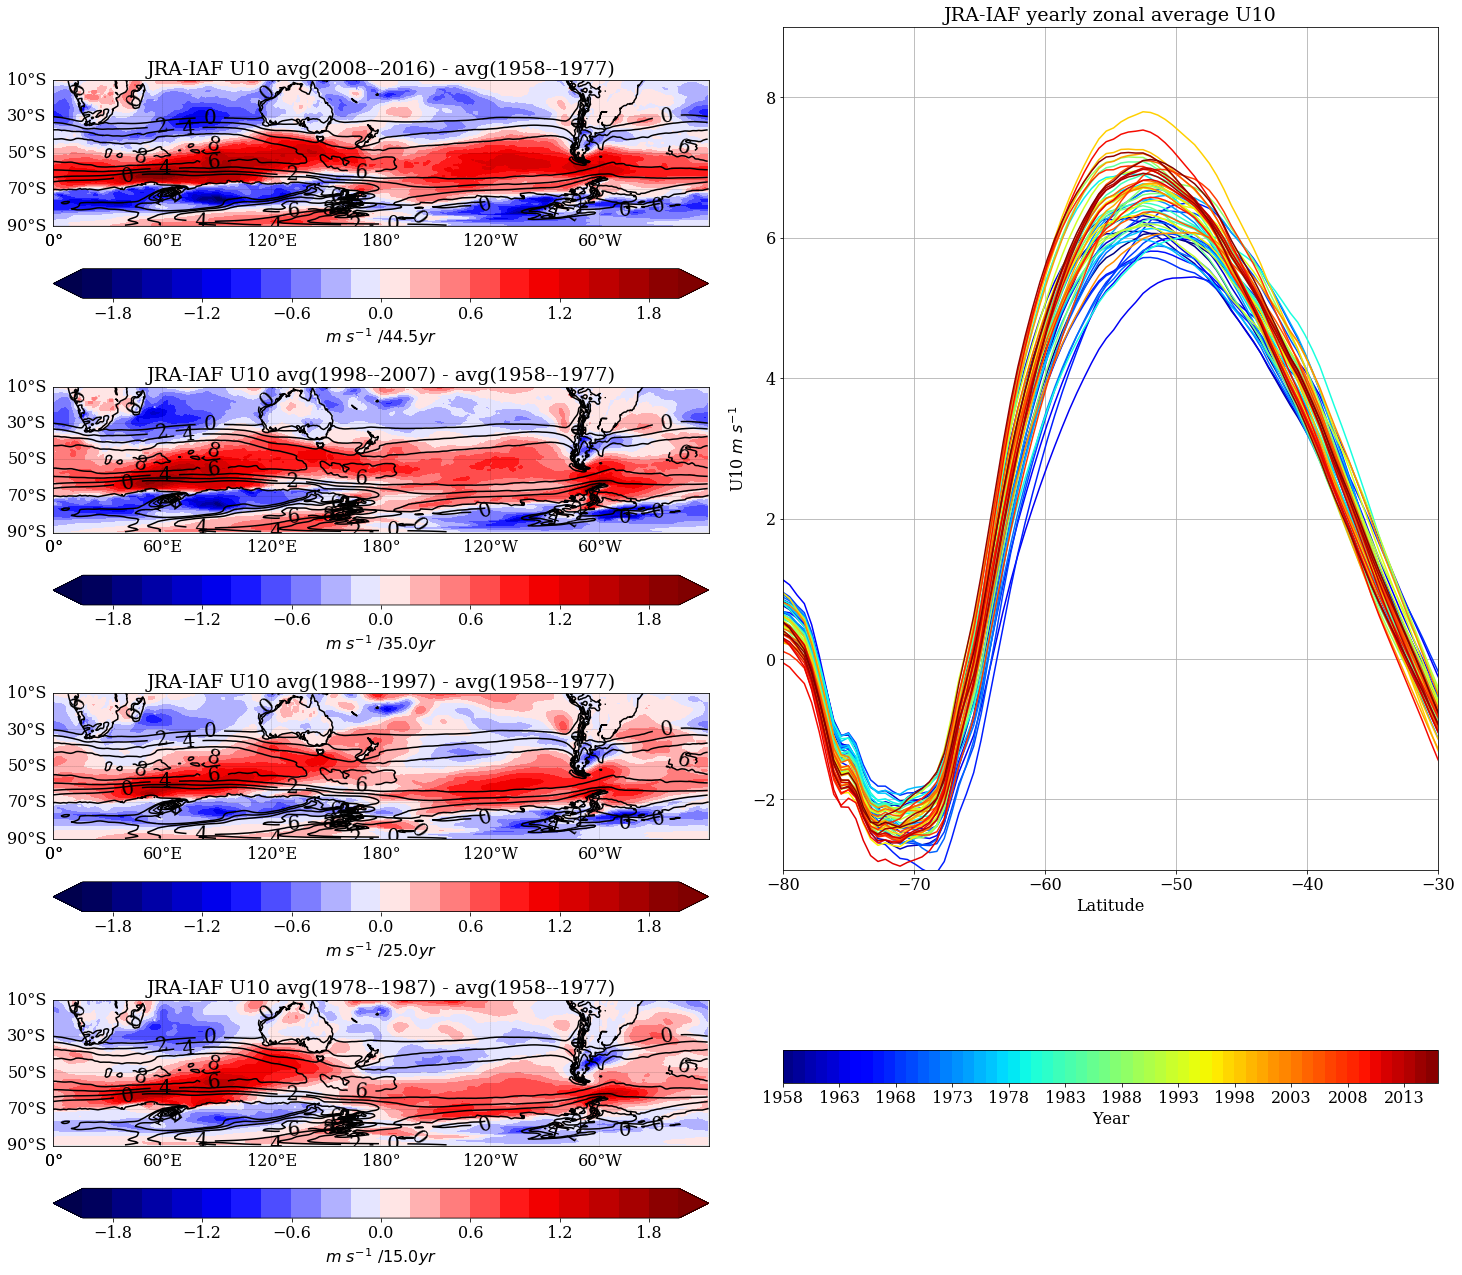

In [34]:
%%time

matplotlib.rcParams.update({'font.size': 16}) 
row = 4
col = 2
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


plt.close('all')
fig = plt.figure() 
fig.set_size_inches(20,20)

#
Bm = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=-10,\
llcrnrlon=0,urcrnrlon=360, resolution='c')
 # meshgrid of lon lats
lons, lats = np.meshgrid(lon, lat)
# use projection template to create x and y axis
Bm_lons, Bm_lats = Bm(lons, lats)

xx,yy = Bm(105, -15)
value = Bm.is_land(xx,yy)
print(value)


##
ax = plt.subplot2grid((row, col), (0, 0))
cmap = 'seismic'
step = 0.2
contf_lvls = np.arange(-2,2+1e-08,step) 
# draw land outlines
Bm.drawcoastlines(linewidth=1.5)
contf = Bm.contourf(Bm_lons, Bm_lats, uas_10m_20082016_baseline, 
                   contf_lvls, cmap=cmap, extend='both')
# meridians. last input is meridians tick label
Bm.drawmeridians(np.arange(0, 360, 60), linewidth=0.2, labels=[0,0,0,1])
# parallels. last input is paralles tick label
Bm.drawparallels(np.arange(-90, 90, 20), linewidth=0.2, labels=[1,0,0,0])
plt.title('JRA-IAF U10 avg(2008--2016) - avg(1958--1977)')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('$m\ s^{-1}\ / ' + str((2008+2016)/2 - (1958+1977)/2) + ' yr$')
cont = Bm.contour(Bm_lons, Bm_lats, uas_10m_baseline, 
                   listrange(22,0,2), colors='black')
plt.clabel(cont, listrange(10,0,2), fmt='%1.0f', inline=True, fontsize=20)

##
ax = plt.subplot2grid((row, col), (1, 0))
cmap = 'seismic'
step = 0.2
contf_lvls = np.arange(-2,2+1e-08,step) 
# draw land outlines
Bm.drawcoastlines(linewidth=1.5)
contf = Bm.contourf(Bm_lons, Bm_lats, uas_10m_19982007_baseline, 
                   contf_lvls, cmap=cmap, extend='both')
# meridians. last input is meridians tick label
Bm.drawmeridians(np.arange(0, 360, 60), linewidth=0.2, labels=[0,0,0,1])
# parallels. last input is paralles tick label
Bm.drawparallels(np.arange(-90, 90, 20), linewidth=0.2, labels=[1,0,0,0])
plt.title('JRA-IAF U10 avg(1998--2007) - avg(1958--1977)')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('$m\ s^{-1}\ / ' + str((1998+2007)/2 - (1958+1977)/2) + ' yr$')
cont = Bm.contour(Bm_lons, Bm_lats, uas_10m_baseline, 
                   listrange(22,0,2), colors='black')
plt.clabel(cont, listrange(10,0,2), fmt='%1.0f', inline=True, fontsize=20)


##
ax = plt.subplot2grid((row, col), (2, 0))
cmap = 'seismic'
step = 0.2
contf_lvls = np.arange(-2,2+1e-08,step) 
# draw land outlines
Bm.drawcoastlines(linewidth=1.5)
contf = Bm.contourf(Bm_lons, Bm_lats, uas_10m_19881997_baseline, 
                   contf_lvls, cmap=cmap, extend='both')
# meridians. last input is meridians tick label
Bm.drawmeridians(np.arange(0, 360, 60), linewidth=0.2, labels=[0,0,0,1])
# parallels. last input is paralles tick label
Bm.drawparallels(np.arange(-90, 90, 20), linewidth=0.2, labels=[1,0,0,0])
plt.title('JRA-IAF U10 avg(1988--1997) - avg(1958--1977)')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('$m\ s^{-1}\ / ' + str((1988+1997)/2 - (1958+1977)/2) + ' yr$')
cont = Bm.contour(Bm_lons, Bm_lats, uas_10m_baseline, 
                   listrange(22,0,2), colors='black')
plt.clabel(cont, listrange(10,0,2), fmt='%1.0f', inline=True, fontsize=20)


##
ax = plt.subplot2grid((row, col), (3, 0))
cmap = 'seismic'
step = 0.2
contf_lvls = np.arange(-2,2+1e-08,step) 
# draw land outlines
Bm.drawcoastlines(linewidth=1.5)
contf = Bm.contourf(Bm_lons, Bm_lats, uas_10m_19781987_baseline, 
                   contf_lvls, cmap=cmap, extend='both')
# meridians. last input is meridians tick label
Bm.drawmeridians(np.arange(0, 360, 60), linewidth=0.2, labels=[0,0,0,1])
# parallels. last input is paralles tick label
Bm.drawparallels(np.arange(-90, 90, 20), linewidth=0.2, labels=[1,0,0,0])
plt.title('JRA-IAF U10 avg(1978--1987) - avg(1958--1977)')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('$m\ s^{-1}\ / ' + str((1978+1987)/2 - (1958+1977)/2) + ' yr$')
cont = Bm.contour(Bm_lons, Bm_lats, uas_10m_baseline, 
                   listrange(22,0,2), colors='black')
plt.clabel(cont, listrange(10,0,2), fmt='%1.0f', inline=True, fontsize=20)




##
start = 0.0
stop = 1.0
number_of_lines= 59
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ matplotlib.cm.jet(x) for x in cm_subsection ]

# CS3 = plt.contourf(uas_10m_zonalmean, cm_subsection, cmap=matplotlib.cm.jet)
# plt.close()

ax = plt.subplot2grid((row, col), (0, 1), rowspan=4)

# print(years[slice(0,20,2)])

for i, color in enumerate(colors):
    plt.plot(lat, uas_10m_zonalmean[i,:], color=color)
plt.xlim([-80, -30])
plt.ylim([-3, 9])
cbar = plt.colorbar(CS3, orientation='horizontal')
cbar.set_ticks(cm_subsection[[listrange(59,0,5)]])
cbar.set_ticklabels(years[slice(0,59,5)])
cbar.set_label('Year')
plt.title('JRA-IAF yearly zonal average U10')
plt.xlabel('Latitude')
plt.ylabel('U10 $m\ s^{-1}$')
plt.grid()
    
# ax = plt.subplot(row,col,4)
# contf = plt.plot(lat, uas_10m_zonalmean.T, cmap='seismic')
# plt.xlim([-90, 10])
# cbar = plt.colorbar(orientation='horizontal')

# ax = plt.subplot(row,col,2, projection=ccrs.PlateCarree())
# ax.coastlines()
# cmap = 'seismic'
# step = 0.005
# contf_lvls = np.arange(-0.04,0.04+1e-08,step)
# uas_10m_slopes.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
# # plt.title('Surface zonal wind speed ' + str(years[fid]))
# ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
# ax.grid()

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig7_.png', bbox_inches='tight', dpi=200)






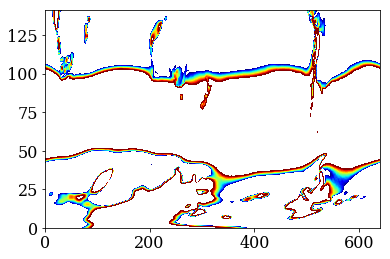

In [24]:
CS3 = plt.contourf(uas_10m_baseline, cm_subsection, cmap='jet')